<a href="https://colab.research.google.com/github/AhamedShimak/pytorch/blob/main/classification_code_along.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORT AND MY DEFINED FUNCTIONS

### Imports

In [117]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

###My functions

In [118]:
import torch
def details(tensor):
  print("")
  print("Shape: ",tensor.shape)
  print("Dimentions: ",tensor.ndim)
  print("###########")
  print(tensor)
  print("###########")
  print("Tensor Data type: ",tensor.dtype)
  print("Device: ",tensor.device)
  print("")

def details_plot(train_data, 
                     train_labels, 
                     test_data, 
                     test_labels,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});



def details_loss_curve(epochs,train_loss_track,test_loss_track):
  #loss curve
  plt.figure(figsize=(8,8))
  plt.title("Loss curve")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.plot(epochs,train_loss_track,label="Train loss")
  plt.plot(epochs,test_loss_track,label="Test loss")
  plt.legend(prop={"size": 14})

def accu(y_pred,y_test):
  correct=torch.eq(y_pred,y_test).sum().item()
  accuracy=(correct/len(y_test))*100
  return accuracy

###GPU

In [119]:
!nvidia-smi
print(torch.cuda.is_available())
#setup device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"
print(device)

/bin/bash: nvidia-smi: command not found
False
cpu


##DATA PROCESS 


ex- tensor data-> x_train,y_train,x_test,y_test


In [120]:
from pandas.core.arrays.arrow import dtype
# create data
  #######to prevent mat multiplication error   .unsqueeze(dim=1)

x,y=make_circles(1000,shuffle=True,noise=0.03,factor=0.8 ,random_state=35)
x=torch.from_numpy(x).to(dtype=torch.float32)
y=torch.from_numpy(y).to(dtype=torch.float32)


data_set= pd.DataFrame({"X1":x[:,0],"X2":x[:,1],"y":y})

In [121]:
data_set.head()

,X1,X2,y
0,-0.467071,-0.703847,1.0
1,0.049240,0.809451,1.0
2,-0.148359,0.841698,1.0
3,0.567739,-0.495415,1.0
4,-0.439440,-0.702983,1.0


In [122]:
data_set[2:4]

,X1,X2,y
2,-0.148359,0.841698,1.0
3,0.567739,-0.495415,1.0


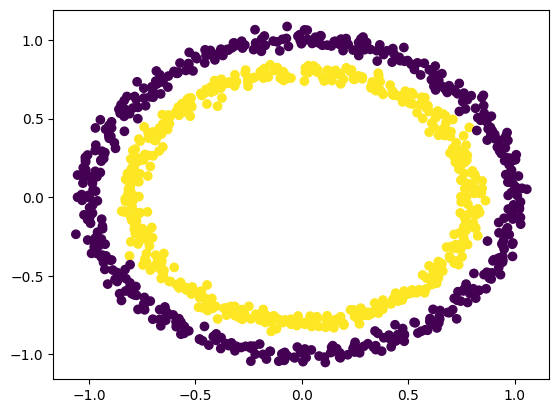

In [123]:
#plt

plt.scatter(data_set["X1"],data_set["X2"],c=data_set['y'])

In [124]:
# create train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [125]:
x_train[:,0]

tensor([-0.0874,  0.1620,  0.7607, -0.1828, -0.4729, -0.1038, -0.9317,  0.4515,
        -0.9327, -0.5883,  0.0448, -0.3472, -0.8040,  0.6750, -0.3796,  0.3048,
         0.3220, -0.2640,  0.4865,  0.8091, -0.1824, -0.5314, -0.3163,  0.0674,
        -0.7992, -0.1484, -0.8342, -0.7164, -0.7705,  0.2419, -0.3808,  0.7634,
         0.6443,  0.8442, -0.6584, -0.9834,  0.5685,  0.1104, -0.8980, -0.6438,
         0.5677,  0.7254,  0.4737, -0.5864,  0.9946, -0.5210,  0.3810,  0.2668,
         0.2617, -0.8124,  0.3372, -0.2530,  0.9226,  0.8162, -1.0067,  0.6666,
         0.4872, -0.7618, -0.0897, -0.7702, -0.7694,  0.9840,  0.2710,  0.4310,
         0.3575,  0.8325,  1.0228,  0.4382,  0.4583, -0.7851,  0.6162,  0.0720,
         0.1138, -0.7751,  0.4244,  0.1522, -0.3756,  0.3135,  0.9438, -0.7748,
        -0.7244,  0.2718,  0.2476, -0.1764,  0.6859, -0.8029,  0.7014, -0.1319,
         0.8357,  0.6966, -0.7054, -0.2396,  0.3441, -0.1722, -0.3076,  0.7097,
         0.6627, -0.9128,  0.6158, -0.60

In [126]:
def details_plot_scatter(x_train, x_test, y_train, y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=plt.cm.BrBG, s=4, label="Training data")
  plt.scatter(x_test[:,0],x_test[:,1],c=y_test, s=60, label="Test data")
  plt.legend(prop={"size": 14});
  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(x_test[:,0],x_test[:,1],c=predictions, s=20, label="Prediction")

  # Show the legend
  plt.legend(prop={"size": 14});

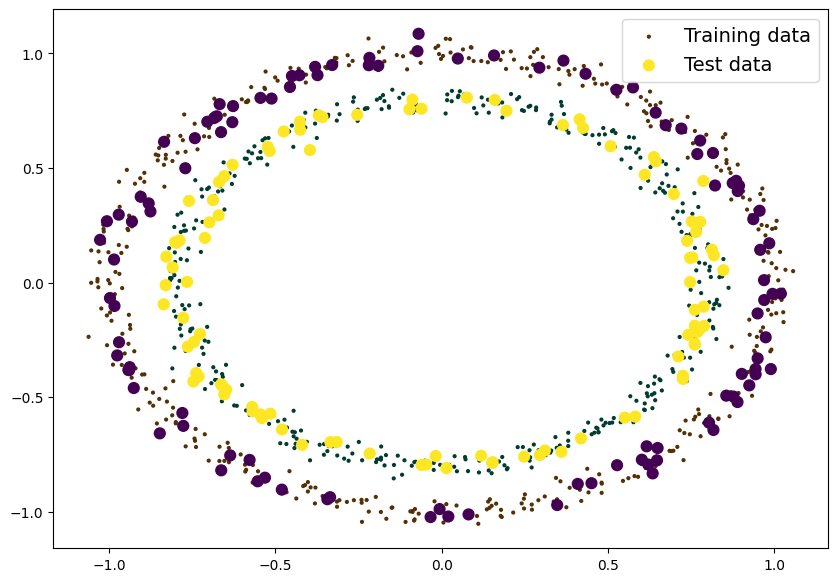

In [127]:
# plot and visualize it
details_plot_scatter(x_train, x_test, y_train, y_test)

In [128]:
y_train[0:3],x[0:7]

(tensor([0., 1., 1.]),
 tensor([[-0.4671, -0.7038],
         [ 0.0492,  0.8095],
         [-0.1484,  0.8417],
         [ 0.5677, -0.4954],
         [-0.4394, -0.7030],
         [-0.7702, -0.2979],
         [ 0.4409, -0.6104]]))

##BUILDING THE MODEL


tips
1. torch.nn.find_suitable_loss
2. torch.nn.Paramenter
3. torch.nn.Module this is base class
4. torch.optim - optimizer

In [116]:
#model
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    #model_structer
    #self.layer_1=nn.Linear(2,8)
    #self.layer_2=nn.Linear(8,5)
    #self.layer_3=nn.Linear(5,1)

    self.combined_layer=nn.Sequential(
    nn.Linear(2,8),
    nn.ReLU(),
    nn.Linear(8,5),
    nn.ReLU(),
    nn.Linear(5,1))
   
  def forward(self,x: torch.Tensor) -> torch.Tensor:
    #return self.layer_3(self.layer_2(self.layer_1(x)))
    return self.combined_layer(x)

#discription of model
torch.manual_seed(33)
model_instance=CircleModelV0()
model_instance.state_dict()

OrderedDict([('combined_layer.0.weight',
              tensor([[ 0.1677,  0.0831],
                      [-0.4332, -0.2320],
                      [-0.4231,  0.2786],
                      [ 0.1934, -0.5018],
                      [ 0.4544, -0.3727],
                      [-0.1835,  0.5895],
                      [-0.6600,  0.3087],
                      [-0.6611, -0.3789]])),
             ('combined_layer.0.bias',
              tensor([-0.4308,  0.5000,  0.0941, -0.3516, -0.6408,  0.2790,  0.2971,  0.0289])),
             ('combined_layer.2.weight',
              tensor([[-9.4230e-02,  7.8627e-02,  3.2548e-01, -4.8948e-02,  2.7620e-01,
                        2.9431e-01,  1.3485e-01,  2.2840e-01],
                      [-4.1849e-02, -2.6686e-01, -1.3966e-02,  2.2549e-05,  1.0293e-01,
                       -3.0918e-01,  2.1647e-02,  1.3651e-01],
                      [ 3.1447e-02, -2.5297e-01, -5.0430e-02, -2.5920e-01, -4.8318e-02,
                       -4.0925e-02, -2.3408e-02,  3.3

In [129]:
CircleModelV1=nn.Sequential(
    nn.Linear(1,1)
)
CircleModelV1
CircleModelV1.state_dict()

OrderedDict([('0.weight', tensor([[0.5090]])), ('0.bias', tensor([0.1618]))])

In [130]:
#make inference/prediction and visualize the model
with torch.inference_mode():
  y_pred=model_instance(x_test)

In [131]:
torch.round(torch.sigmoid(torch.from_numpy(np.array([-10000,-2,0,2,10000000000]))))

tensor([0., 0., 0., 1., 1.])

##CREATE OPTIMIZER / LOSS_FUNC

In [132]:
#create loss func

loss_func=nn.BCEWithLogitsLoss()
#optimizer

optimizer=torch.optim.SGD(model_instance.parameters(),lr=0.0003)


In [133]:
list(model_instance.parameters())

[Parameter containing:
 tensor([[ 0.1677,  0.0831],
         [-0.4332, -0.2320],
         [-0.4231,  0.2786],
         [ 0.1934, -0.5018],
         [ 0.4544, -0.3727],
         [-0.1835,  0.5895],
         [-0.6600,  0.3087],
         [-0.6611, -0.3789]], requires_grad=True),
 Parameter containing:
 tensor([-0.4308,  0.5000,  0.0941, -0.3516, -0.6408,  0.2790,  0.2971,  0.0289],
        requires_grad=True),
 Parameter containing:
 tensor([[-9.4230e-02,  7.8627e-02,  3.2548e-01, -4.8948e-02,  2.7620e-01,
           2.9431e-01,  1.3485e-01,  2.2840e-01],
         [-4.1849e-02, -2.6686e-01, -1.3966e-02,  2.2549e-05,  1.0293e-01,
          -3.0918e-01,  2.1647e-02,  1.3651e-01],
         [ 3.1447e-02, -2.5297e-01, -5.0430e-02, -2.5920e-01, -4.8318e-02,
          -4.0925e-02, -2.3408e-02,  3.3060e-01],
         [ 7.9754e-04,  5.7882e-02,  2.0629e-01,  1.4145e-01, -2.9069e-01,
           1.9667e-01, -1.6334e-01,  3.4649e-01],
         [-1.3195e-02,  7.0362e-02, -2.9176e-01, -4.2429e-02, -7.4

##TRAINING / TESTING LOOP

tips
0. Loop throug the data
1. set to training mode
2. Forward pass
3. Calculate the loss(pred to ground truth)
4. optimizer zer grad
5. loss backward .. back propogation
6. optimizer step - use opt and adjust parameter ... grad desent


In [ ]:
#initiate trackers and hyper parameters
epoch=1000
epochs=range(epoch)
train_loss_track=[]
test_loss_track=[]
#training loop
for epoch in range(epoch):

  model_instance.train()
  y_raw=model_instance(x_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_raw))

  #LOSS CAL
  loss=loss_func(y_raw,y_train)

  optimizer.zero_grad

  loss.backward()
  optimizer.step()
  print(accu(y_pred,y_train))
  with torch.inference_mode():
    model_instance.eval()
    test_raw_pred=model_instance(x_test).squeeze()
    test_loss=loss_func(test_raw_pred,y_test)
    test_loss_track.append(test_loss.detach())
    train_loss_track.append(loss.detach())


  ####testing part
 
details_loss_curve(epochs,train_loss_track,test_loss_track)

In [141]:
y_pred.shape,y_train.shape

(torch.Size([800]), torch.Size([800]))

##EVALUATION OF THE MODEL

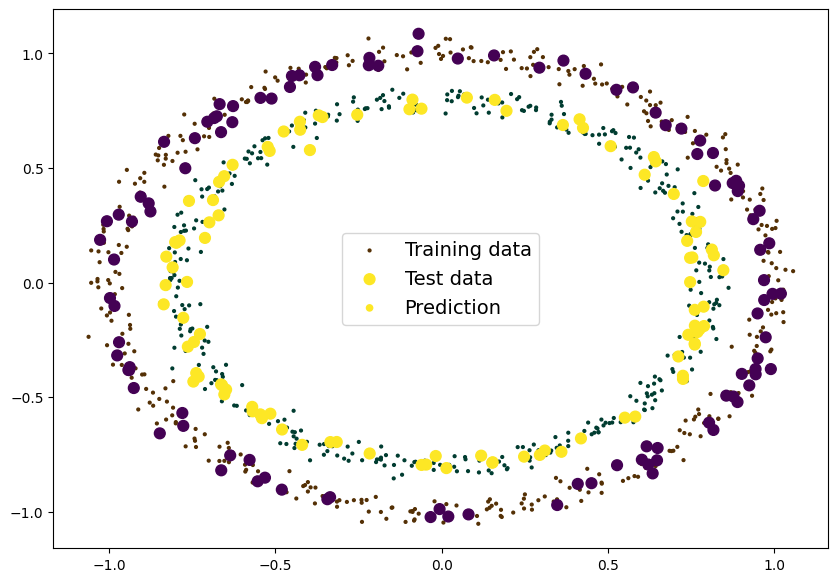

In [142]:
#plot / matrices
with torch.inference_mode():
    model_instance.eval()
    test_raw_pred=model_instance(x_test).squeeze()
    y_pred=torch.round(torch.sigmoid(test_raw_pred))

details_plot_scatter(x_train, x_test, y_train, y_test,y_pred.detach())

In [138]:
torch.eq(y_test,y_pred)

tensor([False,  True, False, False, False,  True,  True, False, False, False,
        False, False, False,  True, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        False, False, False, False, False,  True, False, False,  True, False,
        False, False,  True,  True,  True, False, False,  True, False,  True,
         True,  True,  True, False, False,  True, False,  True,  True, False,
         True,  True,  True, False,  True, False, False,  True, False, False,
        False, False,  True, False, False, False, False, False,  True, False,
         True,  True, False, False,  True, False,  True,  True,  True, False,
         True,  True, False,  True, False, False,  True, False, False,  True,
         True,  True, False, False,  True, False, False,  True, False,  True,
         True, False,  True,  True,  True, False, False, False,  True,  True,
         True,  True,  True,  True, False, False, False, False, 

##SAVING/LOADING

tips
1.  torch.save() 
2.  torch.load()
3.  toch.nn.Module.load_state_dict()